# DATA VISUALIZATION 

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

# Import delle librerie essenziali
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


import os
import copy
import time
import random

from itertools import product







import warnings
warnings.filterwarnings('ignore')

# Configurazione dello stile dei grafici
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Librerie importate con successo!")

# Caricamento del dataset
dataset_path = Path('netflix_titles.csv')
df = pd.read_csv(dataset_path)

print(f"Dimensioni del dataset: {df.shape}")
print(f"\nColonne: {list(df.columns)}")
print("------------------------------------------------------------------")

print("\nPrime righe del dataset:")
df.head(10)

✓ Librerie importate con successo!
Dimensioni del dataset: (8807, 12)

Colonne: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
------------------------------------------------------------------

Prime righe del dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# VALORI MANCANTI

In [113]:
# Tipi e valori mancanti
df.info()
print()
print("------------------------------------------")
print()
# Controllo dei valori mancanti (incluso '?')
print("Valori mancanti per colonna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

------------------------------------------

Valori mancanti per colonna:
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


# VISUALIZZAZIONE DELLA VARIABILE TARGET


type
Movie      6131
TV Show    2676
Name: count, dtype: int64
type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


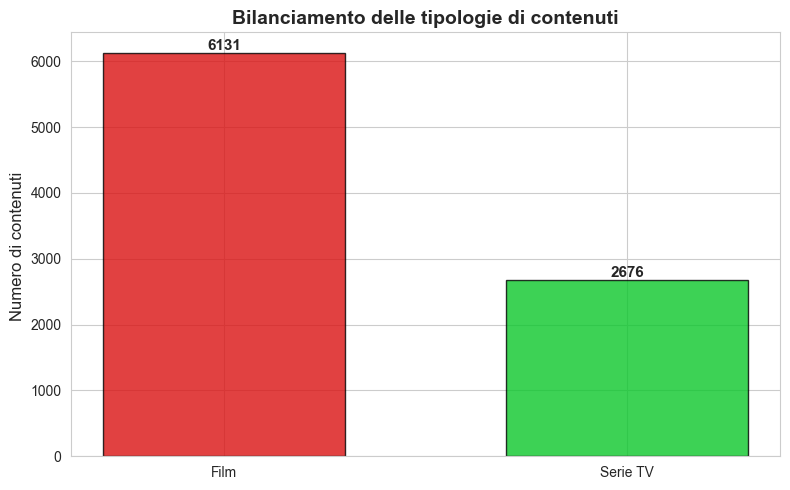

In [114]:
## essendo che il modello dovra' capire se e' un film o serie TV la nostra variabile target e' TYPE 

contenuti = df['type'].value_counts()
print(contenuti)
print(df['type'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
contenuti_label = ['Film', 'Serie TV']
colors = ["#DA1212", "#0CC72B"]
bars = plt.bar(contenuti_label, contenuti.values, color=colors, edgecolor='black', alpha=0.8, width=0.6)

plt.ylabel('Numero di contenuti ', fontsize=12)
plt.title('Bilanciamento delle tipologie di contenuti', fontsize=14, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

In [115]:
contenuti = df['rating'].value_counts()
print(contenuti)
print(df['rating'].value_counts(normalize=True) * 100)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
rating
TV-MA       36.430762
TV-14       24.537090
TV-PG        9.803476
R            9.076451
PG-13        5.566284
TV-Y7        3.794161
TV-Y         3.487447
PG           3.260252
TV-G         2.499148
NR           0.908781
G            0.465750
TV-Y7-FV     0.068159
NC-17        0.034079
UR           0.034079
74 min       0.011360
84 min       0.011360
66 min       0.011360
Name: proportion, dtype: float64


# PREPROCESSING 

## gestione dei dati mancanti

In [116]:
# Gestione dei valori mancanti
# Per le colonne categoriche, sostituiamo con la moda
# Per le colonne numeriche, si sostituirebbe il valore mancante con la mediana ma nel dataset non sono presenti valori nulli in colonne numeriche 

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            # Sostituiamo con la moda per le categoriche
            mode_value = df[col].mode()[0]
            count_sostituiti=df[col].isnull().sum()
            df[col].fillna(mode_value, inplace=True)
            print(f"Colonna '{col}': sostituiti {count_sostituiti} valori mancanti con '{mode_value}' (moda)")


print("\nVerifica finale dei valori mancanti:")
print(df.isnull().sum().sum())

Colonna 'director': sostituiti 2634 valori mancanti con 'Rajiv Chilaka' (moda)
Colonna 'cast': sostituiti 825 valori mancanti con 'David Attenborough' (moda)
Colonna 'country': sostituiti 831 valori mancanti con 'United States' (moda)
Colonna 'date_added': sostituiti 10 valori mancanti con 'January 1, 2020' (moda)
Colonna 'rating': sostituiti 4 valori mancanti con 'TV-MA' (moda)
Colonna 'duration': sostituiti 3 valori mancanti con '1 Season' (moda)

Verifica finale dei valori mancanti:
0


## separazione colonne numeriche da quelle categoriche 

In [117]:
# Identificazione delle colonne numeriche e categoriche
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# Rimuoviamo la variabile target dalla lista delle categoriche
if 'type' in categorical_cols:
    categorical_cols.remove('type')

print(f"Colonne numeriche ({len(numerical_cols)}): {numerical_cols}")
print(f"\nColonne categoriche ({len(categorical_cols)}): {categorical_cols}")


Colonne numeriche (1): ['release_year']

Colonne categoriche (10): ['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


## encoding variabili categoriche 

In [118]:
## essendo che sono molti dati categorici e di varie tipologie usero' varie tipologie di encoding 

binary_cols= ['title', 'director', 'cast', 'country','rating','listed_in','description']
label_cols=['show_id', 'date_added', 'duration']

## il one-hot encoding secondo me non ha senso utilizzarlo perche' nelle colonne categoriche ci sono tanti tipi di valori e andrebbe a creare troppe colonne



le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

## essendo che la mia variabile targhet e' categorica bisogna encodare pure lei 
df['type'] = le.fit_transform(df['type'])
    


be = ce.BinaryEncoder(cols=binary_cols)
df_encoded = be.fit_transform(df)



print(f"Forma del dataset originale: {df.shape}")
print(f"Forma del dataset codificato: {df_encoded.shape}")

Forma del dataset originale: (8807, 12)
Forma del dataset codificato: (8807, 84)


## separazione feature dal target

In [119]:
# Separazione delle feature e del target
X = df_encoded.drop('type', axis=1)
y = df_encoded['type']

print(f"Shape delle feature (X): {X.shape}")
print(f"Shape del target (y): {y.shape}")
print(f"\nDistribuzione del target:")
print(y.value_counts())


Shape delle feature (X): (8807, 83)
Shape del target (y): (8807,)

Distribuzione del target:
type
0    6131
1    2676
Name: count, dtype: int64


## suddivisione in train validation e test set

In [120]:
# prima parte Split train/test (80% trainval, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Manteniamo la stessa proporzione delle classi
)


print(f"Dimensioni del training set: {X_train_val.shape}")
print(f"Dimensioni del test set: {X_test.shape}")
print(f"\nDistribuzione delle classi nel training set:")
print(y_train_val.value_counts())
print(f"\nDistribuzione delle classi nel test set:")
print(y_test.value_counts())

Dimensioni del training set: (7045, 83)
Dimensioni del test set: (1762, 83)

Distribuzione delle classi nel training set:
type
0    4904
1    2141
Name: count, dtype: int64

Distribuzione delle classi nel test set:
type
0    1227
1     535
Name: count, dtype: int64


## bilanciamento + fine di split in set

In [121]:
# Bilanciamento
print("Applicazione bilanciamento classi...")

## molta disparita' quindi uso un approccio misto
pipeline = Pipeline(steps=[
    ('over', RandomOverSampler(sampling_strategy=0.5)),
    ('under', RandomUnderSampler(sampling_strategy=1.0))
])

X_train_val_balanced, y_train_val_balanced = pipeline.fit_resample(X_train_val,y_train_val)



print(f"\nDimensioni PRIMA del bilanciamento:")
print(f"X_train: {X_train_val.shape}")
print(f"y_train: {y_train_val.shape}")
print(f"\nDimensioni DOPO bilanciamento:")
print(f"X_train_balanced: {X_train_val_balanced.shape}")
print(f"y_train_balanced: {y_train_val_balanced.shape}")
print(f"\nDistribuzione delle classi nel train set prima del bilanciamento:")
print(y_train_val.value_counts())
print(f"\nDistribuzione delle classi nel train set dopo il bilanciamento:")
print(y_train_val_balanced.value_counts())


# STEP 2: Separa train (60%) e validation (20%) dal rimanente 80%
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val_balanced, y_train_val_balanced,
    test_size=0.25, 
    random_state=42, 
    stratify=y_train_val_balanced  # 0.25 * 0.8 = 0.2
)

Applicazione bilanciamento classi...

Dimensioni PRIMA del bilanciamento:
X_train: (7045, 83)
y_train: (7045,)

Dimensioni DOPO bilanciamento:
X_train_balanced: (4904, 83)
y_train_balanced: (4904,)

Distribuzione delle classi nel train set prima del bilanciamento:
type
0    4904
1    2141
Name: count, dtype: int64

Distribuzione delle classi nel train set dopo il bilanciamento:
type
0    2452
1    2452
Name: count, dtype: int64


## NORMALIZZAZIONE

In [122]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# MODELLI TRADIZIONALI

## Decision Tree

In [ ]:
# 2. Parametri Decision Tree
param_tree = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_leaf': list(range(1, 20, 2)),
    'min_samples_split': list(range(2, 11, 2)),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_tree, cv=5, verbose=True,scoring='accuracy',n_jobs=-1)
grid_search_tree.fit(X_train, y_train)


print(grid_search_tree.best_estimator_)

best_tree = grid_search_tree.best_params_


print("Best hyper: ", best_tree)

dt = DecisionTreeClassifier(**best_tree)
dt= dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")

#matrice di confusione
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Use unique values for labels
labels = sorted(df['type'].unique())

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice di Confusione - Decision Tree')
plt.show()

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


## ADA Boost

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best accuracy 0.9967380212954747
AdaBoostClassifier(learning_rate=np.float64(1.8786082283349805),
                   n_estimators=420)


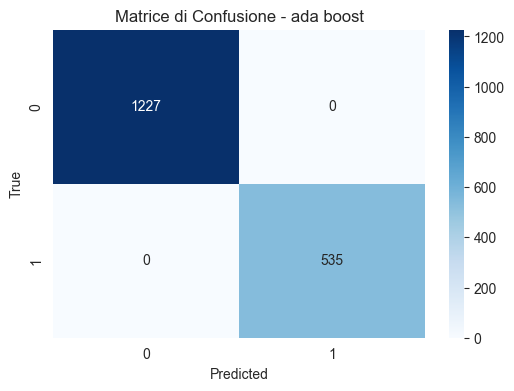

In [ ]:
# 3. Parametri AdaBoost
param_ada = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 2.0),
}

ada = AdaBoostClassifier()

random_search_ada = RandomizedSearchCV(estimator=ada, param_distributions=param_ada, cv=5, verbose=True,n_jobs=-1)
random_search_ada.fit(X_train, y_train)

print("best accuracy",random_search_ada.best_score_)
print(random_search_ada.best_estimator_)


best_ada = random_search_ada.best_params_

ada = AdaBoostClassifier(**best_ada)
ada.fit(X_train, y_train)

# Predict continuous values
y_pred_ada = ada.predict(X_test)

#matrice di confusione
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Use unique values for labels
labels = sorted(df['type'].unique())

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice di Confusione - ada boost')
plt.show()


# RETE NEURALE semplice

In [ ]:
# Configurazione
torch.manual_seed(42)
np.random.seed(42)
plt.style.use('default')

print("📦 Librerie caricate con successo!")
print(f"🔥 PyTorch: {torch.__version__}")

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"⚙️ Device: {device}")


print("📊 DIVISIONE DATASET:")
print(f"🏋️ Train:      {len(X_train):3d} campioni ({len(X_train)/len(X)*100:.1f}%)")
print(f"✅ Validation: {len(X_val):3d} campioni ({len(X_val)/len(X)*100:.1f}%)")
print(f"🎯 Test:       {len(X_test):3d} campioni ({len(X_test)/len(X)*100:.1f}%)")


# Verifica distribuzione classi
print("\n🔍 Distribuzione classi per set:")
for name, y_set in [("Train", y_train), ("Val", y_val), ("Test", y_test)]:
    dist = [np.sum(y_set == i) for i in range(2)]
    print(f"{name:5}: {dist} → {[d/len(y_set)*100 for d in dist]}")


# Conversione in tensori PyTorch
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val) 
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(np.array(y_train, dtype=np.float32))
y_val_tensor = torch.LongTensor(np.array(y_val, dtype=np.float32))  
y_test_tensor =  torch.LongTensor(np.array(y_test, dtype=np.float32))  

print(f"\n🔄 TENSORI PYTORCH:")
print(f"X_train: {X_train_tensor.shape}")
print(f"X_val:   {X_val_tensor.shape}")
print(f"X_test:  {X_test_tensor.shape}")

📦 Librerie caricate con successo!
🔥 PyTorch: 2.10.0+cpu
⚙️ Device: cpu
📊 DIVISIONE DATASET:
🏋️ Train:      3678 campioni (41.8%)
✅ Validation: 1226 campioni (13.9%)
🎯 Test:       1762 campioni (20.0%)

🔍 Distribuzione classi per set:
Train: [np.int64(1839), np.int64(1839)] → [np.float64(50.0), np.float64(50.0)]
Val  : [np.int64(613), np.int64(613)] → [np.float64(50.0), np.float64(50.0)]
Test : [np.int64(1227), np.int64(535)] → [np.float64(69.63677639046539), np.float64(30.363223609534618)]

🔄 TENSORI PYTORCH:
X_train: torch.Size([3678, 83])
X_val:   torch.Size([1226, 83])
X_test:  torch.Size([1762, 83])


In [ ]:
class SimpleNN(nn.Module):

    def __init__(self):
        super(SimpleNN, self).__init__() # Richiama il costruttore della classe padre nn.Module
        
        # Definizione dei layer (strati) della rete
        self.fc1 = nn.Linear(83, 6)    # Layer 1: riceve 4 features input -> 6 neuroni hidden
        self.fc2 = nn.Linear(6, 4)    # Layer 2: 6 input -> 4 neuroni hidden
        self.fc3 = nn.Linear(4, 2)     # Output Layer: 4 input -> 2 classi finali (Iris Setosa, Versicolor, Virginica)
        
        
        # Funzioni di attivazione e regolarizzazione
        self.relu = nn.ReLU()          # Attivazione Rectified Linear Unit (introduce non-linearità)
        self.dropout = nn.Dropout(0.2) # Regolarizzazione: spegne casualmente il 20% dei neuroni per ridurre l'overfitting
        
    def forward(self, x):
        # Questo metodo definisce come i dati attraversano la rete (Forward Pass)
        # 1. Primo layer nascosto
        x = self.fc1(x)       # Trasformazione lineare
        x = self.relu(x)      # Attivazione non lineare
        x = self.dropout(x)   # Dropout
        
        # 2. Secondo layer nascosto
        x = self.fc2(x)       # Trasformazione lineare
        x = self.relu(x)      # Attivazione non lineare
        x = self.dropout(x)   # Dropout
        
        # 3. Layer di output
        x = self.fc3(x)
        return x

# Crea un'istanza del modello e la sposta sul device configurato (CPU o GPU)
model = SimpleNN().to(device)

print("🧠 MODELLO CREATO:")
print(f"Architettura: Input(83) → Hidden(6) → Hidden(4) → Output(2)")
# print(f"Pesi dei layer: {next(model.parameters())}")
print(f"\n{model}")

🧠 MODELLO CREATO:
Architettura: Input(83) → Hidden(6) → Hidden(4) → Output(2)

SimpleNN(
  (fc1): Linear(in_features=83, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
# Configurazione training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# DataLoaders
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

print("⚙️ CONFIGURAZIONE:")
print(f"Loss: {criterion.__class__.__name__}")
print(f"Optimizer: {optimizer.__class__.__name__}")
print(f"Learning Rate: {optimizer.param_groups[0]['lr']}")
print(f"Batch Size: {batch_size}")
print(f"Batches per epoch: {len(train_loader)}")

⚙️ CONFIGURAZIONE:
Loss: CrossEntropyLoss
Optimizer: Adam
Learning Rate: 0.01
Batch Size: 16
Batches per epoch: 230


In [ ]:
# Training loop con validation
# Impostiamo il numero di volte (epoche) che il modello vedrà l'intero dataset
num_epochs = 10

# Liste per salvare i risultati e visualizzarli graficamente
train_losses = []
val_losses = []
train_accs = []
val_accs = []

print("🚀 INIZIO TRAINING...")
print("-" * 50)

for epoch in range(num_epochs):
    # ==========================
    # 1. FASE DI TRAINING
    # ==========================
    model.train() # Imposta il modello in modalità training (abilita Dropout e BatchNorm)
    
    train_loss = 0
    train_correct = 0
    train_total = 0
    
    # Itera sui batch 
    for batch_X, batch_y in train_loader:
        # Sposta i dati sul device corretto (CPU o GPU)
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        #Forward Pass ---
        outputs = model(batch_X) # Calcola le predizioni del modello
        
        # Calcolo della Loss ---
        loss = criterion(outputs, batch_y) # Quanto ha sbagliato il modello?
        
        # Backward Pass (Apprendimento) ---
        optimizer.zero_grad()   # 1. Pulisce i gradienti vecchi 
        loss.backward()         # 2. Calcola i gradienti (la direzione verso cui correggere i pesi)
        optimizer.step()        # 3. Aggiorna i pesi facendo un passo nella direzione opposta all'errore
        
        # Statistiche ---
        train_loss += loss.item() # Accumula l'errore totale
        
        # Calcola l'accuratezza
        _, predicted = torch.max(outputs.data, 1) # Prende la classe con probabilità più alta
        train_total += batch_y.size(0)
        train_correct += (predicted == batch_y).sum().item()
    
    # ==========================
    # 2. FASE DI VALIDATION
    # ==========================
    model.eval() # Imposta il modello in modalità valutazione (disabilita Dropout)
    val_loss = 0
    val_correct = 0
    val_total = 0
    
    # torch.no_grad() disabilita il calcolo dei gradienti:
    # Riduce l'uso di memoria e accelera i calcoli (non dobbiamo addestrare qui)
    with torch.no_grad():
        X_val_dev = X_val_tensor.to(device)
        y_val_dev = y_val_tensor.to(device)
        
        # Forward pass (solo predizione)
        val_outputs = model(X_val_dev)
        
        # Calcolo loss e accuratezza
        val_loss = criterion(val_outputs, y_val_dev).item()
        _, val_predicted = torch.max(val_outputs.data, 1)
        
        val_total = y_val_dev.size(0)
        val_correct = (val_predicted == y_val_dev).sum().item()
    
    # ==========================
    # 3. CALCOLO METRICHE
    # ==========================
    train_acc = train_correct / train_total
    val_acc = val_correct / val_total
    avg_train_loss = train_loss / len(train_loader)
    
    # Salviamo i dati per i grafici
    train_losses.append(avg_train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    # Stampa i progressi ogni 25 epoche
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1:3d}/{num_epochs} | "
              f"Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

print("-" * 50)
print("✅ TRAINING COMPLETATO!")
print(f"🎯 Best Train Acc: {max(train_accs):.4f}")
print(f"🎯 Best Val Acc: {max(val_accs):.4f}")
print(f"📊 Final Gap: {abs(train_accs[-1] - val_accs[-1]):.4f}")

🚀 INIZIO TRAINING...
--------------------------------------------------
Epoch   5/25 | Train Loss: 0.2109 | Train Acc: 0.9198 | Val Loss: 0.2220 | Val Acc: 0.9201
Epoch  10/25 | Train Loss: 0.1933 | Train Acc: 0.9258 | Val Loss: 0.2297 | Val Acc: 0.9119
Epoch  15/25 | Train Loss: 0.1954 | Train Acc: 0.9201 | Val Loss: 0.2158 | Val Acc: 0.9209
Epoch  20/25 | Train Loss: 0.1908 | Train Acc: 0.9250 | Val Loss: 0.2286 | Val Acc: 0.9127
Epoch  25/25 | Train Loss: 0.1859 | Train Acc: 0.9222 | Val Loss: 0.2348 | Val Acc: 0.9144
--------------------------------------------------
✅ TRAINING COMPLETATO!
🎯 Best Train Acc: 0.9282
🎯 Best Val Acc: 0.9225
📊 Final Gap: 0.0079


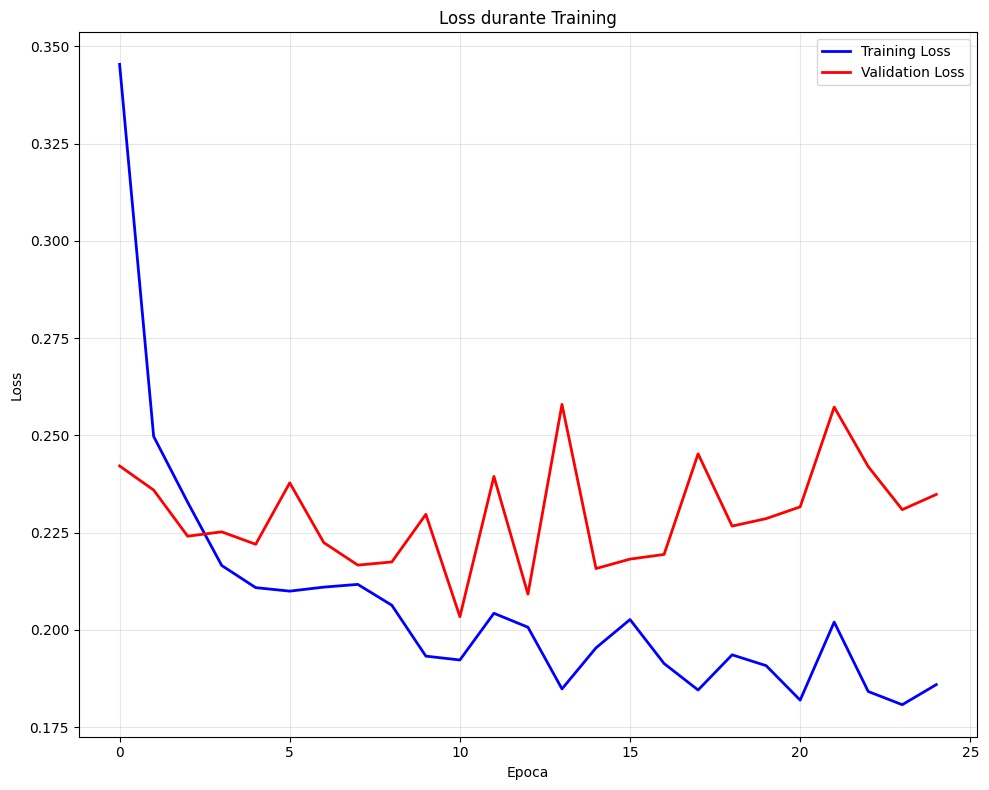

In [ ]:
# Visualizza l'andamento del training
fig, ax = plt.subplots(figsize=(10, 8))

# Loss
ax.plot(train_losses, 'b-', label='Training Loss', linewidth=2)
ax.plot(val_losses, 'r-', label='Validation Loss', linewidth=2)
ax.set_title('Loss durante Training')
ax.set_xlabel('Epoca')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:


model.eval()
test_predictions = []
test_true = []

with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    test_predictions = predicted.numpy()
    test_true = y_test

# Calcola le metriche finali
test_accuracy = accuracy_score(test_true, test_predictions)
test_f1 = f1_score(test_true, test_predictions, average='weighted')

print("PERFORMANCE FINALI SUL TEST SET:")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"F1-Score: {test_f1:.4f}")
print()

class_names = [str(c) for c in sorted(df['type'].unique())]
# Report di classificazione dettagliato
print("CLASSIFICATION REPORT:")

print(classification_report(test_true, test_predictions, target_names=class_names))

PERFORMANCE FINALI SUL TEST SET:
Accuracy: 0.9398 (93.98%)
F1-Score: 0.9403

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1227
           1       0.88      0.93      0.90       535

    accuracy                           0.94      1762
   macro avg       0.92      0.94      0.93      1762
weighted avg       0.94      0.94      0.94      1762



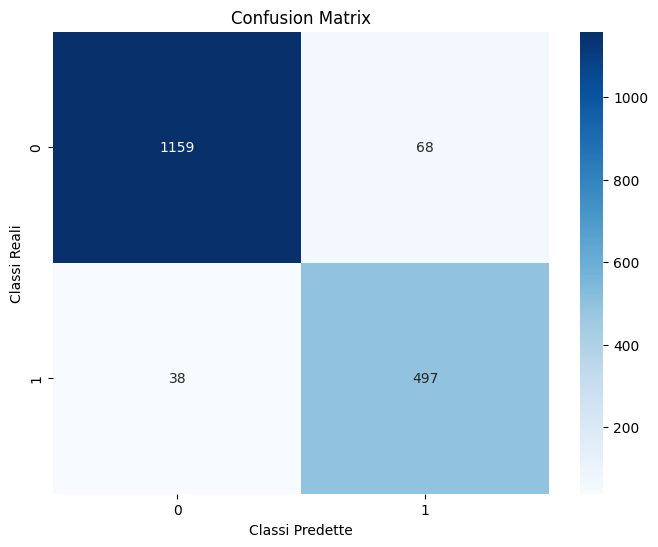

ANALISI DEGLI ERRORI (Primi 10):
Esempio 27: Vero=0, Predetto=1
Esempio 34: Vero=0, Predetto=1
Esempio 37: Vero=0, Predetto=1
Esempio 53: Vero=1, Predetto=0
Esempio 54: Vero=0, Predetto=1
Esempio 82: Vero=1, Predetto=0
Esempio 85: Vero=0, Predetto=1
Esempio 86: Vero=0, Predetto=1
Esempio 108: Vero=0, Predetto=1
Esempio 127: Vero=1, Predetto=0


In [ ]:


cm = confusion_matrix(test_true, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=df['type'].unique(), 
            yticklabels=df['type'].unique())
plt.title('Confusion Matrix')
plt.ylabel('Classi Reali')
plt.xlabel('Classi Predette')
plt.show()



y_true_flat = np.array(test_true).flatten()
y_pred_flat = np.array(test_predictions).flatten()
class_names = sorted(df['type'].unique())

print("ANALISI DEGLI ERRORI (Primi 10):")
count = 0
for i in range(len(y_true_flat)):
    if y_true_flat[i] != y_pred_flat[i]:
        # Ora l'indice i è un semplice intero 0, 1, 2...
        vero = class_names[int(y_true_flat[i])]
        predetto = class_names[int(y_pred_flat[i])]
        
        print(f"Esempio {i}: Vero={vero}, Predetto={predetto}")
        count += 1
    if count >= 10: 
        break

# RETE NEURALE con GrindSearch

In [ ]:


def fix_random(seed):
    torch.manual_seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

fix_random(42)


In [ ]:
# Conversione dei dati da NumPy arrays a PyTorch Tensors
# Le reti neurali in PyTorch lavorano con i "tensori" (matrici n-dimensionali che possono stare su GPU)


val_dataloader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=y_val_tensor.shape[0])
test_dataloader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=y_test_tensor.shape[0])

In [ ]:
def get_model(input_size=83, dept=3, hidden_size=64, dropout_prob=0.2):

    # 1. Primo layer: Connette l'input al primo strato nascosto
    model = [nn.Linear(input_size, hidden_size), nn.ReLU() ]
    
    # 2. Layer intermedi (Hidden): Vengono aggiunti in un ciclo in base a 'dept'
    for i in range(dept):
        model.append(nn.Linear(hidden_size, hidden_size)) # Connessione lineare
        model.append(nn.ReLU())                           # Attivazione non lineare
        model.append(nn.Dropout(dropout_prob))            # Regolarizzazione (Dropout)
        
    # 3. Output layer: Connette l'ultimo layer nascosto alle 3 classi finali
    model.append(nn.Linear(hidden_size, 2))
    
    # nn.Sequential unisce la lista di layer in un unico modello ordinato
    return nn.Sequential(*model)

In [ ]:
# --- GRID SEARCH SETUP ---
hidden_size = [128, 256]          
dropout_prob = [0.2, 0.3]         
dept = [3, 4]                     
batch_size = [16, 32]             
learning_rate = [0.001, 0.01]     

params = product(hidden_size, dropout_prob, dept, batch_size, learning_rate)

# Calcoliamo quante combinazioni dovremo testare
combinations = len(hidden_size)*len(dropout_prob)*len(dept)*len(batch_size)*len(learning_rate)
print("Numero totale di configurazioni da testare: ", combinations)

Numero totale di configurazioni da testare:  32


In [ ]:
def train(model, train_dataloader, val_dataloader, device, hidden_size=3, dropout_prob=0.2, dept=2, epochs=100, batch_size=32, learning_rate=.001):
    """
    Esegue il training di un singolo modello.
    """
    # LOSS FUNCTION: Usiamo CrossEntropyLoss perché è un problema di Classificazione 
    criterion = nn.CrossEntropyLoss()
    
    # OPTIMIZER: Adam è l'algoritmo che aggiorna i pesi per minimizzare l'errore
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Liste per salvare lo storico degli errori
    train_loss = []
    val_loss = []

    # EARLY STOPPING:
    # ferma il modello se smette di migliorare sul validation set.
    best_model = None
    best_loss = np.inf   # Inizializziamo con infinito
    patience = 10        # Quante epoche aspettiamo se non migliora
    patience_counter = 0

    # --- CICLO DI TRAINING (EPOCHE) ---
    for epoch in range(epochs):
        epoch_start = time.time()
        epoch_loss = 0

        # Mettiamo il modello in modalità training (abilita Dropout, ecc.)
        model.train() 

        # Iteriamo sui batch di dati
        for x, y in train_dataloader:
            x, y = x.to(device), y.to(device) 
            
            optimizer.zero_grad()    # 1. Azzeriamo i gradienti precedenti
            y_pred = model(x)        # 2. Forward pass (previsione)
            loss = criterion(y_pred, y) # 3. Calcolo errore
            loss.backward()          # 4. Backward pass (calcolo gradienti)
            optimizer.step()         # 5. Aggiornamento pesi
            
            epoch_loss += loss.item()

        # Salviamo la loss media di training per questa epoca
        train_loss.append(epoch_loss / len(train_dataloader))

        # --- VALIDATION ---
        model.eval() # Modalità valutazione (disabilita Dropout)
        epoch_val_loss = 0
        with torch.no_grad(): # Disabilita calcolo gradienti (più veloce, meno memoria)
            for x, y in val_dataloader:
                x, y = x.to(device), y.to(device)
                y_pred = model(x)
                loss = criterion(y_pred, y)
                epoch_val_loss += loss.item()
        val_loss.append(epoch_val_loss / len(val_dataloader))

        # Stampa progressi ogni 10 epoche
        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Train loss: {train_loss[-1]:.4f}, Val loss: {val_loss[-1]:.4f}, Time: {time.time()-epoch_start:.2f}s')

        # --- EARLY STOPPING CHECK ---
        # Se l'errore di validazione è il più basso visto finora, salviamo questo modello
        if val_loss[-1] < best_loss:
            best_loss = val_loss[-1]
            best_model = copy.deepcopy(model) # Creiamo una copia del modello attuale
            patience_counter = 0 # Resettiamo il contatore
        else:
            # Se non migliora, incrementiamo il contatore
            patience_counter += 1
            if patience_counter == patience:
                # Se abbiamo aspettato troppo interrompiamo.
                print("Early stopping...") 
                break

    print("Training terminato in {} epoche. Miglior validation loss: {}".format(epoch+1, best_loss))

    # Restituiamo il miglior modello trovato (non necessariamente l'ultimo)
    return best_model, train_loss, val_loss

In [ ]:
def test_model(model, test_dataloader, device):
    """
    Valuta il modello finale sul Test Set per ottenere accuracy e predizioni.
    """
    model.eval() # Importante: modalità valutazione
    y_pred = []
    y_true = []
    
    with torch.no_grad():
        for x, y in test_dataloader:
            x , y = x.to(device), y.to(device)
            
            output = model(x)
            _, predicted = torch.max(output, 1) # Ottieni classe vincente
            
            y_pred.extend(predicted.cpu().tolist())
            y_true.extend(y.cpu().tolist())
            
    return y_pred, y_true

In [ ]:
# --- CICLO PRINCIPALE GRID SEARCH ---
# Qui proviamo ad allenare una rete diversa per ogni combinazione di iperparametri
best_model = None
best_accuracy = 0
best_config = None
iter_count = 0 

# Iteriamo su tutte le combinazioni generate
for hidden_size, dropout_prob, dept, batch_size, learning_rate in params:
    iter_count += 1
    print(f'\n--- Iterazione {iter_count}/{combinations} ---')
    print(f'Configurazione: Hidden={hidden_size}, Drop={dropout_prob}, Dept={dept}, Batch={batch_size}, LR={learning_rate}')

    # 1. Creiamo un NUOVO modello con questa specifica configurazione
    model = get_model(X_train.shape[1], dept=dept, hidden_size=hidden_size, dropout_prob=dropout_prob)
    
    # Creiamo il DataLoader specifico (perché il batch_size cambia)
    train_dataloader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)

    # Dizionario utile per salvare la configurazione corrente
    config = {
        'hidden_size': hidden_size,
        'dropout_prob': dropout_prob,
        'dept': dept,
        'batch_size': batch_size,
        'learning_rate': learning_rate
    }

    # 2. Alleniamo il modello e otteniamo la versione migliore (grazie all'early stopping)
    trained_model, train_loss, val_loss = train(model, train_dataloader, val_dataloader, device, **config)

    # 3. Testiamo il modello allenato sul Test Set
    y_pred, y_true = test_model(trained_model, test_dataloader, device)
    test_acc = accuracy_score(y_true, y_pred)
    
    print(f'Test Accuracy: {test_acc:.4f} (Migliore attuale: {best_accuracy:.4f})')

    # 4. Confronto: È questo il modello migliore visto finora?
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_model = copy.deepcopy(trained_model) # Salviamo una copia
        best_config = config
        print("🏆 NUOVO RECORD!")



--- Iterazione 1/32 ---
Configurazione: Hidden=128, Drop=0.2, Dept=3, Batch=16, LR=0.001
Epoch 10/100, Train loss: 0.0260, Val loss: 0.4235, Time: 0.36s
Early stopping...
Training terminato in 13 epoche. Miglior validation loss: 0.17872312664985657
Test Accuracy: 0.9467 (Migliore attuale: 0.0000)
🏆 NUOVO RECORD!

--- Iterazione 2/32 ---
Configurazione: Hidden=128, Drop=0.2, Dept=3, Batch=16, LR=0.01
Epoch 10/100, Train loss: 0.2388, Val loss: 0.3812, Time: 0.51s
Early stopping...
Training terminato in 13 epoche. Miglior validation loss: 0.20998303592205048
Test Accuracy: 0.9501 (Migliore attuale: 0.9467)
🏆 NUOVO RECORD!

--- Iterazione 3/32 ---
Configurazione: Hidden=128, Drop=0.2, Dept=3, Batch=32, LR=0.001
Epoch 10/100, Train loss: 0.0261, Val loss: 0.3506, Time: 0.19s
Early stopping...
Training terminato in 12 epoche. Miglior validation loss: 0.19248852133750916
Test Accuracy: 0.9415 (Migliore attuale: 0.9501)

--- Iterazione 4/32 ---
Configurazione: Hidden=128, Drop=0.2, Dept=3, B

In [ ]:
print(f'Best config: {best_config}')
print(f'Best accuracy: {best_accuracy}')

Best config: {'hidden_size': 128, 'dropout_prob': 0.2, 'dept': 4, 'batch_size': 32, 'learning_rate': 0.001}
Best accuracy: 0.9511918274687855


In [ ]:
y_pred, y_true = test_model(best_model, test_dataloader, device)
acc = accuracy_score(y_true, y_pred)
print(f'Final Accuracy score: {acc}')

Final Accuracy score: 0.9511918274687855


In [ ]:
print(f"accuracy Decision Tree {accuracy_score(y_test, y_pred_dt):.4f}")

print(f"Accuracy ADAboost: {accuracy_score(y_test, y_pred_ada):.4f}")

print("accuracy della rete neurale semplice", test_accuracy)

print("accuracy della rete neurale con iperparametri scelti dal GrindSearch", acc)


accuracy Decision Tree 0.9898
Accuracy ADAboost: 1.0000
accuracy della rete neurale semplice 0.9398410896708286
accuracy della rete neurale con iperparametri scelti dal GrindSearch 0.9511918274687855
